In [1]:
import pandas as pd
import numpy as np
from functools import reduce
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier as KNN

In [2]:
#DB, USER ID, FOLLOWERS COUNT, 

In [3]:
data = pd.read_csv('allbrands_users_captions_list.csv')
data = data[data['followers_count']>10000]
data = data[data['followers_count']<100000]

In [15]:
list_users = ['ana_brandine', 'vicky_regouli', 'luismiguelpss', 'ilariabiagini', 
              'emnegg', 'kerendhahn', 'agiorgina', 'roulamatta', 'jussbieber9827', 
              'eremiaheidr', 'eunhuiheo', 'anastasiakaps', 'achaelilsone', 'orit_talbi',
              'sorayaalassmi', 'altonolnlis', 'vaso1977', 'theunrealobserver', 'nsb.koc',
              'vivpeng', 'amrynevillek', 'danalev7', 'irienyree', 'lilachturgeman', 
              'emel_karakoc', 'thiswhomustbekept', 'j_f_lil', 'ulietteearneye', 
              'gilanaz', 'sarrahdolly', 'alexchahine97', 'photographerarson', 
              'angecanindo', 'fiona_smithson', 'chelsea_xu620']
for i,v in enumerate(data.username): 
    for j, k in enumerate(list_users):
        if str(v) == list_users[j]:
            print(v)
            
    #### Note to Karan: 
    ### we need to pick our users. They don't match

## dataframe created at end of doc

In [5]:
dftest = (data.sample(n=15)).reset_index()
dftest

,index,Unnamed: 0,username,followers_count,caption
0,14,14,aichanicole,14119,['Throwback #tokyo #trip #travel #lifestyle #a...
1,42,42,a_lifestyle_blog,13203,"[""Sometimes you'll just get those days where y..."
2,22,22,bimbidotgirl,40185,"['🤗 #erdemxhm 💐 Hai vinto 👏🏻👏🏻👏🏻', '... 🔮cosa ..."
3,139,139,aguademayozapatos,20600,['Absolutamente cómodos #tenis #massif #nuevac...
4,73,73,alexandalexacom,51246,['❄️ WINTER DAYS: COATS 🌨\r\n\r\nTake your lit...
5,51,51,bbberenger,15866,"[""J'ai oublié de me peigner les poils des bras..."
6,26,26,cclaudiaff,10870,['“Il #pinotnero è come una bella ragazza con ...
7,52,52,begumtellioglu,19660,['❤️ D u b a i ❤️ #waitingfor #fountainshowdub...
8,74,74,alexandramiro,38932,['Excited to be working with our new press age...
9,136,136,_nina_pol,11362,['Ωραία γυναίκα είναι αυτή που η γοητεία της ε...


In [ ]:
# drop the ones that don't use english!


# save to csv 
#.to_csv('usersused.csv', sep=',')

In [6]:
#Saturday

userlist=[]

usernameforeachpost  = []
f2post = []
f3post = []

for i,v in enumerate(dftest.username):
    # save the usernames
    userlist.append(v) 
    
    captionsfromsample = dftest.caption
    captionsfromsample = (pd.DataFrame(captionsfromsample)).reset_index()
    captionsfromsample.drop(['index'], axis =1, inplace = True)
    listof = []
    for num, singlepost in enumerate(captionsfromsample.caption): 
        f1 = singlepost.split("\', \'")
        f3 = []

        for j,k in enumerate(f1):
            f2 = (f1[j].replace("\n", " ")).replace("\\", "")
            f3.append(f2)
            usernameforeachpost.append(v)
            f2post.append(f2)
            f3post.append(f3)
        listof.append(f3)
print(len(f2), len(f2post), len(usernameforeachpost))
#df1991 = pd.DataFrame({'caption': f3post, 'username': usernameforeachpost})  

428 56475 56475


In [7]:
df1991 = pd.DataFrame({'caption': f2post, 'username': usernameforeachpost})  

This is working!

In [8]:
df1991['polarity'] = np.zeros(len(df1991.caption))
vectorizer = CountVectorizer(stop_words=['and', 'or', 'before', 'a', 'an', 'the']) #min_df=4
corpus = df1991['caption'].values
x = vectorizer.fit_transform(corpus)
x = x.toarray()
y = df1991['polarity'].values

## it outputs words
## each line, token column


In [9]:
#vectorizer.vocabulary_
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [10]:
print("done")

done


In [11]:
print(x.shape,  y.shape)

(56475, 14529) (56475,)


In [12]:
listofwordspercluster = []
#listofwords =[]
clusteritison = []
K=[]
totallist = []

for i in range(2,8):
    true_k = i
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
    model.fit(x)

    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()

    for i in range(true_k):
        #print("Cluster :" , i+1)
        listofwords = []
        for ind in order_centroids[i, :-1]:
            listofwords.append(terms[ind])
        #print(listofwords)
        totallist.append(listofwords)
        #print(totallist)
        #listofwordspercluster.append(listofwords)
        clusteritison.append(int(i+1))
        K.append(true_k)
    
DFofall = pd.DataFrame({'K_askedfor': K, 'clusternumber': clusteritison, 'listofwordspercluster':  totallist})  

In [13]:
DFofall

,K_askedfor,clusternumber,listofwordspercluster
0,2,1,"[rn, to, in, of, is, my, it, mensfashion, with..."
1,2,2,"[rn, com, aguademayo, www, in, to, aichalifest..."
2,3,1,"[aichalifestyle, lifestyle, instaday, fashion,..."
3,3,2,"[rn, to, in, of, it, is, my, this, mensfashion..."
4,3,3,"[rn, com, aguademayo, www, in, to, en, de, wit..."
5,4,1,"[rn, to, in, our, alohacollection, with, rrn, ..."
6,4,2,"[rn, in, to, is, with, this, our, it, you, of,..."
7,4,3,"[rn, to, in, mensfashion, of, it, is, my, on, ..."
8,4,4,"[com, aguademayo, www, aichalifestyle, in, lif..."
9,5,1,"[aguademayo, aguademayozapatos, shoes, colombi..."


In [14]:
DFofall.to_csv('clustersandwords.csv', sep=',')

In [18]:
DFofall.listofwordspercluster[4]

['rn',
 'com',
 'aguademayo',
 'www',
 'in',
 'to',
 'en',
 'de',
 'with',
 'of',
 'for',
 'our',
 'la',
 'this',
 'on',
 'alohacollection',
 'rrn',
 'you',
 'new',
 'your',
 'from',
 'python',
 'loja',
 'con',
 'bio',
 'link',
 'is',
 'br',
 'sandalias',
 'aliciastore',
 'di',
 'que',
 'tacones',
 'we',
 'no',
 'site',
 'shoes',
 'travellightwithus',
 'un',
 'italiano',
 'love',
 'el',
 'para',
 'all',
 'aguademayozapatos',
 'at',
 'verano',
 'collection',
 'be',
 '3116290704',
 'gratis',
 'na',
 'are',
 'primavera',
 'instafashion',
 'aloha',
 'summer',
 'it',
 'fashionpost',
 'heels',
 'colombianproducts',
 'modamujer',
 'colombianbrands',
 'shoponline',
 'fashionshoes',
 'womenshoes',
 'italianleathershoes',
 'cueroitaliano',
 'shoelovetruelove',
 'shoegram',
 'botas',
 'shop',
 'xa0',
 'del',
 '000',
 'my',
 'week',
 'up',
 'boots',
 'now',
 'little',
 'u200d',
 '2017',
 'weekend',
 'negro',
 'zapatosdemoda',
 'todo',
 'disponível',
 'il',
 'by',
 'los',
 'style',
 'colombia',
 'g

In [26]:
brands = ['athenaprocopiou',  'dodobaror', 'emporiosirenuse', 
          'heidikleinswim', 'lisamariefernandez', 'loupcharmant', 'miguelinagambaccini', 
          'muzungusisters', 'zeusndione']

DFall = pd.DataFrame()

## missing 'daftcollectionofficial'
for brand in brands:
    posts_data = pd.read_csv(brand + '_posts.csv')
    
    posts  = posts_data.caption
    username = posts_data.username
    
    df = pd.DataFrame({'caption': posts, 'username': username})
    DFall = pd.concat([DFall, df])
        



In [30]:
print(df.columns, df.isnull().sum(axis=0).tolist())

Index(['caption', 'username'], dtype='object') [0, 0]


In [32]:
text = (DFall.caption)

In [46]:
DFall['polarity'] = np.zeros(len(DFall.caption))
vectorizer = CountVectorizer(stop_words=['and', 'or', 'before', 'a', 'an', 'the']) #min_df=4
#corpus = v.fit_transform(DFall['caption'].values.astype('U'))

corpus = text[pd.notnull(text)]
#corpus = DFall['caption'].values
x = vectorizer.fit_transform(corpus)
x = x.toarray()
y = DFall['polarity'].values

## it outputs words
## each line, token column


In [47]:
print(y.shape)

(2044,)


In [61]:
listofwordspercluster = []
#listofwords =[]
clusteritison = []
K=[]
totallist = []
dist = []

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
 


for i in range(2,8):
    true_k = i
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
    model.fit(x)
    
    dist.append(sum(np.min(cdist(x, model.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])
    

    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()

    for i in range(true_k):
        #print("Cluster :" , i+1)
        listofwords = []
        for ind in order_centroids[i, :-1]:
            listofwords.append(terms[ind])
        #print(listofwords)
        totallist.append(listofwords)
        #print(totallist)
        #listofwordspercluster.append(listofwords)
        clusteritison.append(int(i+1))
        K.append(true_k)
    
DFclusters = pd.DataFrame({'K_askedfor': K, 'clusternumber': clusteritison, 'listofwordspercluster':  totallist})  

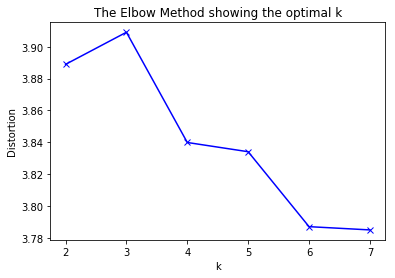

In [62]:
plt.plot(range(2,8), dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [40]:
DFclusters.to_csv('clustersandwords_companies.csv', sep=',')

In [45]:
DFofall

,K_askedfor,clusternumber,listofwordspercluster
0,2,1,"[to, we, of, in, our, is, this, so, all, you, ..."
1,2,2,"[in, our, love, summer, dress, to, of, is, on,..."
2,3,1,"[in, our, love, heidiklein, bikini, summer, st..."
3,3,2,"[miguelinamoment, roundtheworldinmiguelina, gl..."
4,3,3,"[in, dress, to, is, of, summer, love, for, thi..."
5,4,1,"[love, heidiklein, style, swimwear, travel, in..."
6,4,2,"[com, matchesfashion, now, available, mytheres..."
7,4,3,"[in, dress, to, is, of, summer, for, this, lov..."
8,4,4,"[in, our, zeusndione, on, lisamariefernandez, ..."
9,5,1,"[ss16, beautiful, by, our, we, pink, pinkgirln..."


### using Karan's method

In [53]:
#Define Cluster Count
cluster_count = 2


#Implement K-Means Algortihm
model_kmeans = KMeans(n_clusters=cluster_count, random_state=9001)

#Fit Model and Predict
model_kmeans.fit(x)
y_pred = model_kmeans.predict(x)
DFall['Prediction'] = model_kmeans.labels_
display(DFall.head())

#df['Prediction'] = model_kmeans.labels_
#display(df.head())

ValueError: Length of values does not match length of index

In [ ]:
DFall['Prediction'] = np.zeros(len(DFall.caption))

In [ ]:

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
 
# clustering dataset
# determine k using elbow method
 
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
 
    
 
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])
 
plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()
 
# create new plot and data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']
 
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
 
